# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: Shabrina Husna Batubara**
- **Email: shabinahusna1@gmail.com**
- **ID Dicoding: shabrinahusna**

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dari waktu ke waktu dalam dataset ini?
- Apakah terdapat perbedaan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Memuat tabel day
day_df = pd.read_csv("/content/drive/MyDrive/bangkit/Bike Sharing Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Memuat tabel hour
hour_df = pd.read_csv("/content/drive/MyDrive/bangkit/Bike Sharing Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assesing Data

**Menilai data day_df**

In [4]:
#Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dari data diatas dapat kita simpulkan bahwa tidak ada missing value pada data tersebut, tetapi ada kesalahan dtype pada dteday yang seharusnya memiliki type data datetime. kesalahan ini nanti akan kita perbaiki pada proses data cleaning

In [5]:
#Memeriksa missing value pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

hasil pemeriksaan missing value terbukti bahwa data tersebut tidak memiliki missing value

In [6]:
#Periksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


hasil pemeriksaan duplikasi data menunjukkan bahwa data tersebut tidak memiliki duplikasi data

In [7]:
#Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari data tersebut dapat kita simpulkan bahwa tidak ada keanehan dalam parameter statistiknya

**Menilai data hour_df**

In [8]:
#Menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dari data diatas dapat kita simpulkan bahwa tidak ada missing value pada data tersebut, tetapi ada kesalahan dtype pada dteday yang seharusnya memiliki type data datetime

In [9]:
#Memeriksa missing value pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pemeriksaan missing value dari data tersebut terbukti bahwa data hour_df tidak memiliki missing value

In [10]:
#Periksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


hasil pemeriksaan duplikasi data menunjukkan bahwa data hour_df tidak memiliki duplikasi data

In [11]:
#Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


dari data tersebut dapat kita simpulkan bahwa tidak ada keanehan dalam parameter statistiknya

##Cleaning Data

**Membersihkan Data day_df**

In [12]:
#Mengubah Dtype
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

di tahap ini, tidak ada data yang harus kita bersihkan tetapi kita mengganti data type dari dteday menjadi datetime

**Membersihkan Data hour_df**

In [13]:
#Mengubah Dtype
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

di tahap ini, tidak ada data yang harus kita bersihkan tetapi kita mengganti data type dari dteday menjadi datetime

## Exploratory Data Analysis (EDA)

**Eksplorasi Data day_df**

In [14]:
day_df.describe(include="all")

<ipython-input-14-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


**Eksplorasi Data hour_df**

In [15]:
hour_df.describe(include="all")

<ipython-input-15-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


**Eksplorasi Data day_df dan hour_df**

In [16]:
#proses merge
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Menghitung nilai Recency
current_date = pd.to_datetime('2024-03-03')
all_df['recency'] = (current_date - all_df['dteday']).dt.days

# Menghitung nilai Frequency
all_df['frequency'] =all_df.groupby('instant_x')['instant_x'].transform('count')

# Menghitung nilai Monetary
all_df['monetary'] = all_df['cnt_x']

# Menampilkan hasil RFM analysis
rfm_df = all_df.groupby('instant_x').agg({
    'recency': 'min',
    'frequency': 'max',
    'monetary': 'sum'
}).reset_index()

print(rfm_df)

     instant_x  recency  frequency  monetary
0            1     4810         24     23640
1            2     4809         23     18423
2            3     4808         22     29678
3            4     4807         23     35926
4            5     4806         23     36800
..         ...      ...        ...       ...
726        727     4084         24     50736
727        728     4083         24     74280
728        729     4082         24     32184
729        730     4081         24     43104
730        731     4080         24     65496

[731 rows x 4 columns]


pada baris pertama, recency adalah 4810, yang berarti pelanggan pada baris pertama memiliki transaksi terakhir 4810 hari yang lalu. pada baris pertama, frequency adalah 24, yang berarti pelanggan pada baris pertama telah melakukan 24 transaksi dalam periode waktu yang diamati. pada baris pertama, monetary adalah 23640, yang berarti pelanggan pada baris pertama telah menghabiskan 23640 unit uang dalam transaksi.

In [18]:
all_df.to_csv("all_data.csv", index=False)

### Pertanyaan 1:Bagaimana tren penggunaan sepeda dari waktu ke waktu dalam dataset ini?

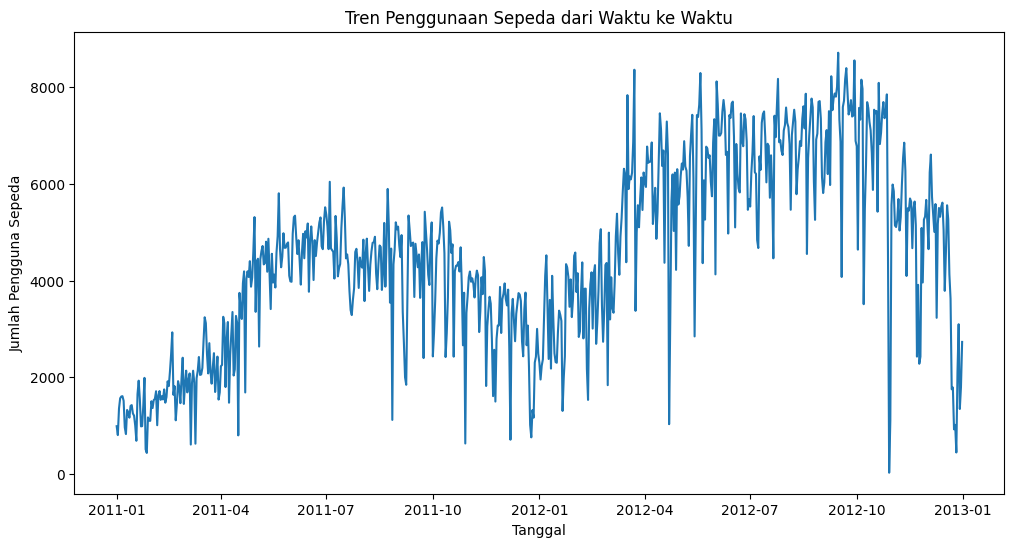

In [35]:
#Membuat plot tren penggunaan sepeda dari waktu ke waktu
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Tren Penggunaan Sepeda dari Waktu ke Waktu')
plt.show()

jumlah pengguna sepeda dari waktu ke waktu mengalami penaikan dan penurunan. pada juli 2011, pengguna sepena mengalami penaikan mencapai 6000. tetapi pada bulan januari 2012 pengguna sepeda mengalami penurunan, dan ketika juli 2012 hingga oktober 2012, pengguna sepeda kembali mengalami penaikan lebih dari 8000. adapun pada januari 2013 kembali mengalami penurunan hingga 2000 pengguna

### Pertanyaan 2:Apakah terdapat perbedaan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan?

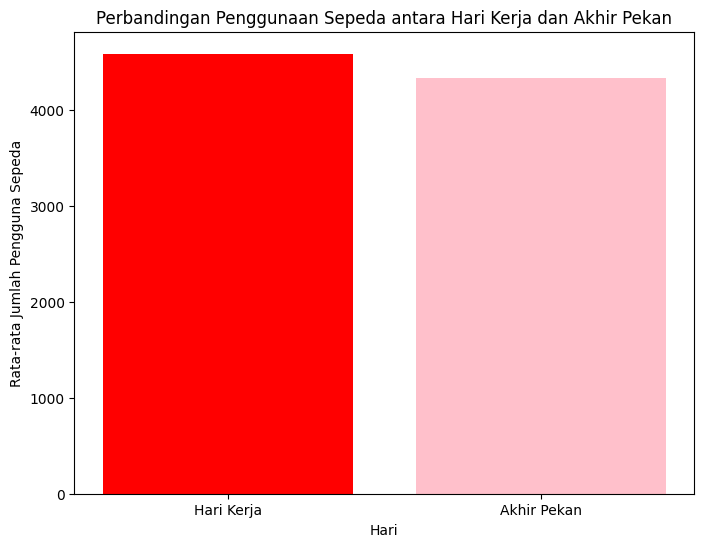

In [32]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
weekday_data = day_df[day_df['workingday'] == 1]
weekend_data = day_df[day_df['workingday'] == 0]

# Menghitung rata-rata penggunaan sepeda per hari kerja dan akhir pekan
weekday_avg = weekday_data['cnt'].mean()
weekend_avg = weekend_data['cnt'].mean()

# Membuat plot perbandingan penggunaan sepeda antara hari kerja dan akhir pekan
plt.figure(figsize=(8, 6))
plt.bar(['Hari Kerja', 'Akhir Pekan'], [weekday_avg, weekend_avg], color=['red', 'pink'])
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.title('Perbandingan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.show()


pengguna sepeda pada hari kerja lebih banyak yaitu mencapai kurang lebih 46000 dibandingkan dengan akhir pekan atau weekend yang mencapai kurang lebih 43000 pengguna

## Conclusion

- Conclution pertanyaan 1 : Terjadi fluktuasi yang signifikan dalam jumlah pengguna sepeda dari waktu ke waktu. Pada beberapa periode, terjadi peningkatan, sementara pada periode lain terjadi penurunan. Pola penggunaan sepeda dipengaruhi oleh faktor musiman dan juga faktor lain seperti cuaca dan acara-acara khusus. Peningkatan signifikan dalam penggunaan sepeda dapat terjadi saat kondisi yang menguntungkan terpenuhi, sementara penurunan terjadi ketika faktor-faktor tersebut tidak mendukung.


- Conclution pertanyaan 2 : penggunaan sepeda bervariasi antara hari kerja dan akhir pekan. Jumlah pengguna sepeda pada hari kerja lebih tinggi, mungkin karena kebutuhan transportasi sehari-hari, sementara pada akhir pekan penggunaan sepeda tetap tinggi meskipun dalam skala yang sedikit lebih rendah, mungkin karena alasan rekreasi dan gaya hidup aktif